Business Problem
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce through a combination of world-class infrastructure, high-quality logistics operations, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data to help widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

*  Column Profiling
data: Indicates whether the data is for testing or training.
trip_creation_time: Timestamp of trip creation.
route_schedule_uuid: Unique ID for a particular route schedule.
route_type: Transportation type (FTL - Full Truck Load, Carting - Handling system with small vehicles).
trip_uuid: Unique ID for a particular trip (may include different source and destination centers).
source_center: Source ID of trip origin.
source_name: Source name of trip origin.
destination_center: Destination ID.
destination_name: Destination name.
od_start_time: Trip start time.
od_end_time: Trip end time.
start_scan_to_end_scan: Time taken to deliver from source to destination.
is_cutoff: Unknown field.
cutoff_factor: Unknown field.
cutoff_timestamp: Unknown field.
actual_distance_to_destination: Distance in kilometers between source and destination warehouse.
actual_time: Actual time taken to complete the delivery (cumulative).
osrm_time: Time calculated by an open-source routing engine, which computes the shortest path between points on a map, including usual traffic (cumulative).
osrm_distance: Distance calculated by an open-source routing engine, which computes the shortest path between points on a map, including usual traffic (cumulative).
factor: Unknown field.
segment_actual_time: Time taken by a segment of the package delivery.
segment_osrm_time: OSRM segment time, which is the time taken by a segment of the package delivery.
segment_osrm_distance: OSRM distance for a segment of the package delivery.
segment_factor: Unknown field.

*  Objectives of the Project

Perform Exploratory Data Analysis (EDA) on the given dataset and find insights.
Provide useful insights and business recommendations that can help the business grow.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import gdown as gd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import math
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2,chi2_contingency,f_oneway,kruskal,shapiro
import statsmodels.api as sm


In [ ]:
!gdown 1-NaCUyRnUHzvhCLaBbELxrrzEWdWx6M6


Downloading...
From: https://drive.google.com/uc?id=1-NaCUyRnUHzvhCLaBbELxrrzEWdWx6M6
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:01<00:00, 54.7MB/s]


In [ ]:
data = pd.read_csv('delhivery_data.csv')

*   The dataset has 144,867 entries with the following columns.The dataset contains 24 columns, with mixed data types: object, int64, float64, and bool.
Columns source_name and destination_name only have a few missing values 293 and 261 null values, respectively.
*   Numerical columns :start_scan_to_end_scan, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, and segment_factor.



*   Details of Numerical columns:
actual_distance_to_destination: Mean = 284.77 km, Std Dev = 421.12 km
actual_time: Mean = 416.93 min, Std Dev = 598.10 min
osrm_time: Mean = 213.87 min, Std Dev = 308.01 min
osrm_distance: Mean = 284.77 km, Std Dev = 421.12 km
factor: Mean = 2.12, Std Dev = 1.72
segment_actual_time: Mean = 36.20 min, Std Dev = 53.57 min
segment_osrm_time: Mean = 18.51 min, Std Dev = 14.78 min
segment_osrm_distance: Mean = 22.83 km, Std Dev = 17.86 km
segment_factor: Mean = 2.22, Std Dev = 4.85

*   Averages of time and distance:
The average delivery time is approximately 7 hours, with a wide range from 9 minutes to over 75 hours.
The average distance to the destination is around 285 km, with a wide range from 9 km to over 2300 km.
*   The average actual time is significantly higher than the estimated OSRM time.


*  Route types:Full Truck Load and Carting.
    





In [ ]:
data.shape

(144867, 24)

Data have 24 columns and 144867 rows

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
# Removing duplicates
data = data.drop_duplicates()

In [ ]:
# Datatype of the columns in customers table:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
#Confirming missing values are found  using the sum-total fn()
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
data.shape


(144867, 24)

In [ ]:
data.head().T

,0,1,2,3,4
data,training,training,training,training,training
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
od_start_time,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600


In [ ]:
# 1.1.a Numerical columns- mean strategy is used.
numerical_cols = data.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# 1.1.b Categorical columns- fill with 'unknown'
categorical_cols = data.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='constant', fill_value='unknown')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])


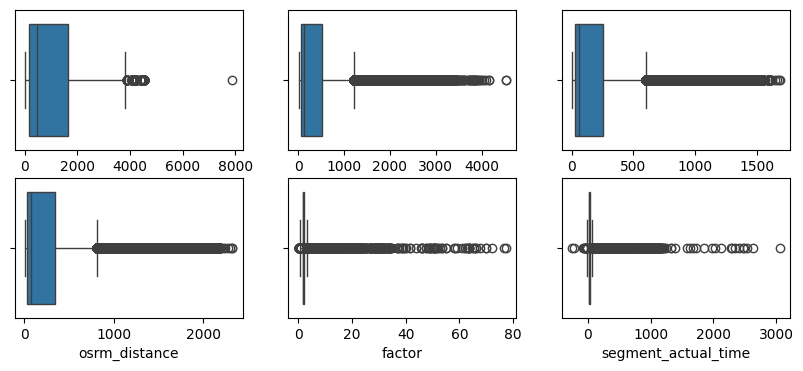

<Axes: xlabel='segment_osrm_time'>

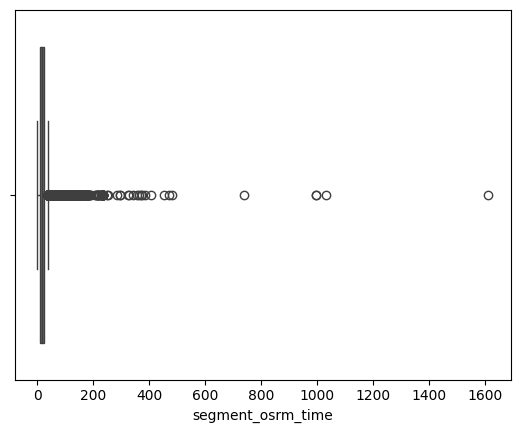

In [ ]:
#1.2 Profiling using boxplots
num_cols = ['start_scan_to_end_scan', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 4))
index = 0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=data[num_cols[index]], ax=axis[row, col])
    index += 1
plt.show()
sns.boxplot(x=data[num_cols[-1]])


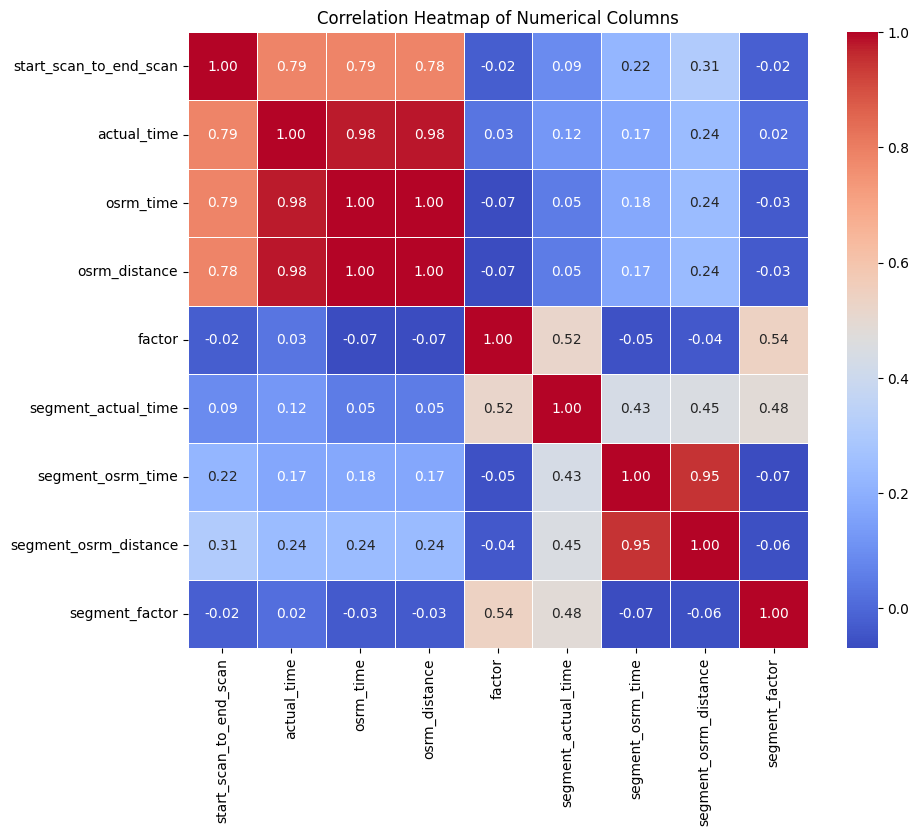

In [ ]:
# 1.3 Correlation heatmap
numerical_columns = ['start_scan_to_end_scan', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [ ]:
#1.2 Converting time columns into daytime format.
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in time_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')


In [ ]:
#1.3 Analyzing the structure & characteristics of the dataset
print(data.info())
print(data.describe())
print(data.head())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
 #Time difference between od_start_time and od_end_time
data['od_time_diff_hour'] = (data['od_end_time'] - data['od_start_time']).dt.total_seconds() / 3600

In [ ]:
#2.1.Unique identifier for segments
data['segment_key'] = data['trip_uuid'] + '_' + data['source_center'] + '_' + data['destination_center']

In [ ]:
#2.1.b Grouping by segment_key and calculate cumulative sums
data['segment_actual_time_sum'] = data.groupby('segment_key')['segment_actual_time'].cumsum()
data['segment_osrm_distance_sum'] = data.groupby('segment_key')['segment_osrm_distance'].cumsum()
data['segment_osrm_time_sum'] = data.groupby('segment_key')['segment_osrm_time'].cumsum()


In [ ]:
# 2.2.Unique identifier for segments
data['segment_key'] = data['trip_uuid'] + '_' + data['source_center'] + '_' + data['destination_center']


In [ ]:
# 2.2.b Aggregation dictionary
create_segment_dict = {
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'is_cutoff': 'max',
    'cutoff_factor': 'mean',
    'cutoff_timestamp': 'last',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'factor': 'mean',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_factor': 'mean'
}


In [ ]:
# 3.1.a Time difference between od_start_time and od_end_time
# 3.1.b Dropping default od_start_time and od_end_time columns
data['od_start_time'] = pd.to_datetime(data['od_start_time'], format='%H:%M.%f')
data['od_end_time'] = pd.to_datetime(data['od_end_time'], format='%H:%M.%f')
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])
data['od_time_diff_hour'] = (data['od_end_time'] - data['od_start_time']).dt.total_seconds() / 3600

data = data.drop(columns=['od_start_time', 'od_end_time'])


In [ ]:
#3.2 Split source_name into source_city, source_place_code, source_state
source_split = data['source_name'].str.extract(r'(?P<source_city>[^-]+)-(?P<source_place_code>[^ ]+) \((?P<source_state>[^)]+)\)')

# Split destination_name into destination_city, destination_place_code, destination_state
destination_split = data['destination_name'].str.extract(r'(?P<destination_city>[^-]+)-(?P<destination_place_code>[^ ]+) \((?P<destination_state>[^)]+)\)')

# Concatenate the new columns to the original dataframe
data = pd.concat([data, source_split, destination_split], axis=1)


In [ ]:
#3.4 Extracting features from trip_creation_time
data['trip_creation_year'] = data['trip_creation_time'].dt.year
data['trip_creation_month'] = data['trip_creation_time'].dt.month
data['trip_creation_day'] = data['trip_creation_time'].dt.day
data['trip_creation_hour'] = data['trip_creation_time'].dt.hour
data['trip_creation_minute'] = data['trip_creation_time'].dt.minute

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
#4.1 Unique identifier based on the combination of trip_uuid, source_center, and destination_center
data['segment_key'] = data['trip_uuid'] + '_' + data['source_center'] + '_' + data['destination_center']


In [ ]:
# 4.1.a Aggregating segment data
data['segment_actual_time_sum'] = data.groupby('segment_key')['segment_actual_time'].cumsum()
data['segment_osrm_distance_sum'] = data.groupby('segment_key')['segment_osrm_distance'].cumsum()
data['segment_osrm_time_sum'] = data.groupby('segment_key')['segment_osrm_time'].cumsum()

In [ ]:
 # 4.1.b Aggregation dictionary for trip-level aggregation
create_trip_dict = {
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'source_center': 'first',
    'destination_center': 'last',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'factor': 'mean'
}

In [ ]:
# 4.2.a Detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]
    data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]


In [ ]:
# 4.2.b
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



In [ ]:
# 4.2.c Remove outliers from each numerical column using IQR
numerical_columns = [ 'start_scan_to_end_scan', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']
for col in numerical_columns:
    data = remove_outliers(data,col)

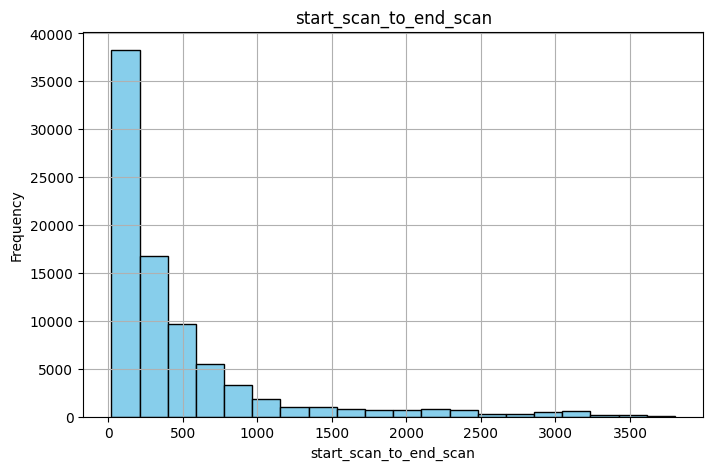

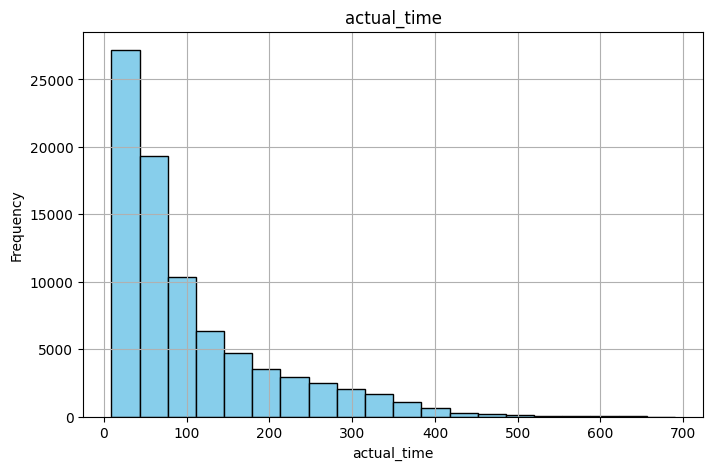

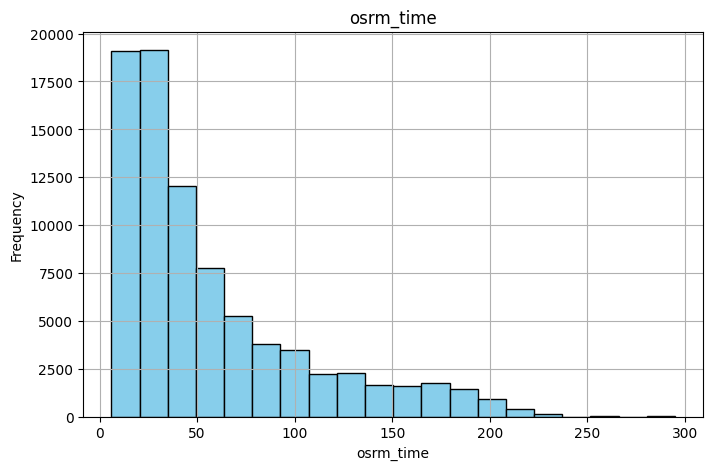

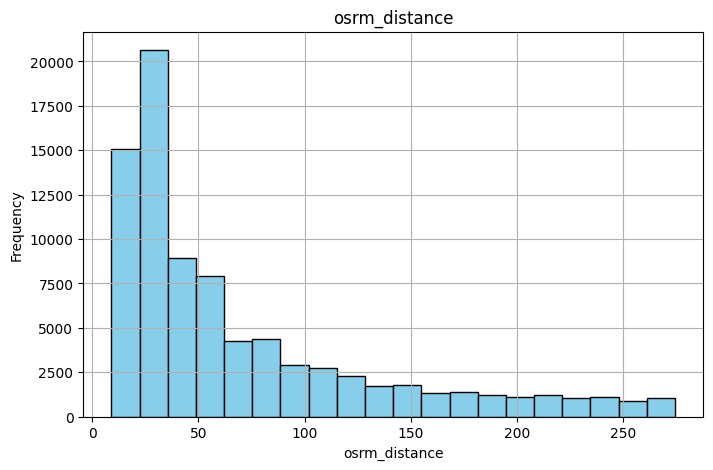

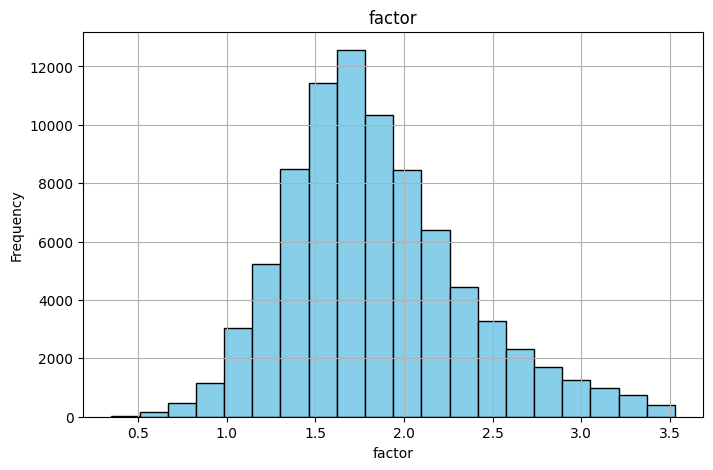

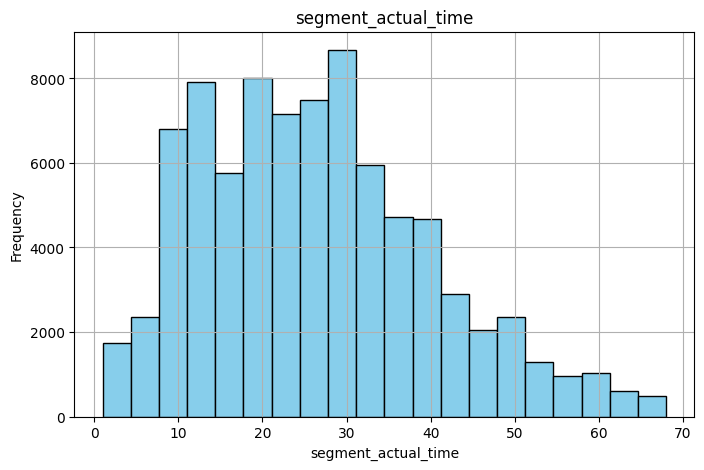

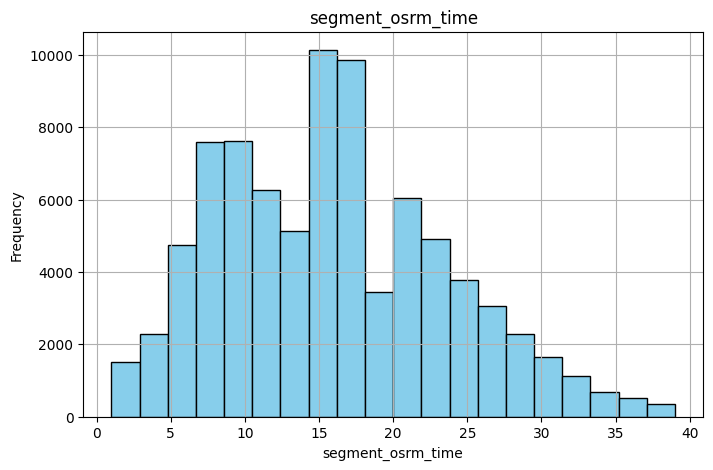

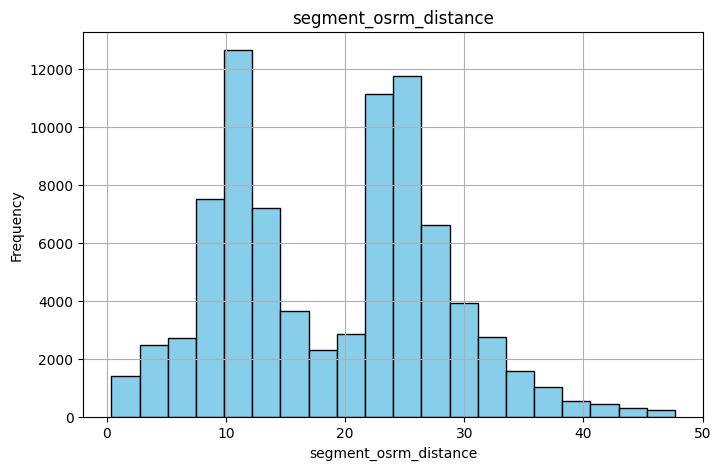

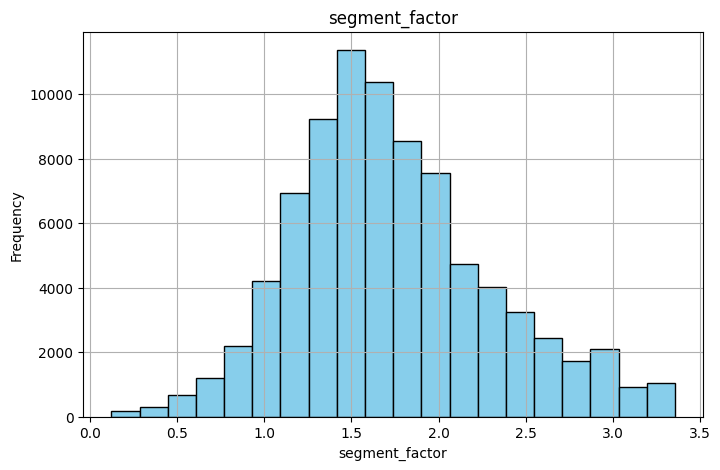

In [ ]:
#4.2.d. Plot cleaned data
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

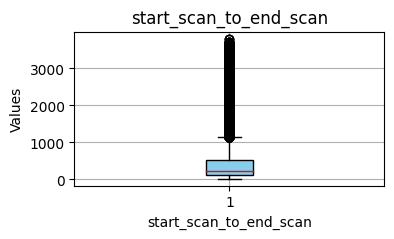

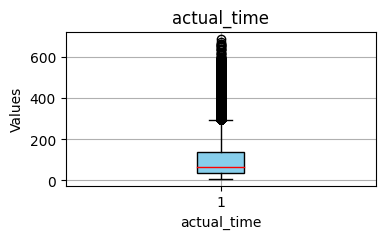

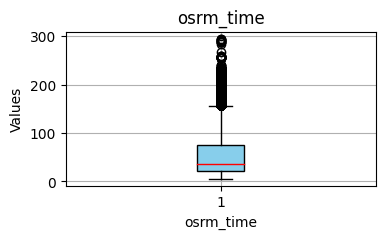

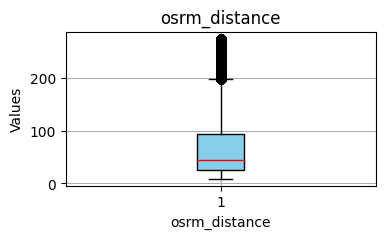

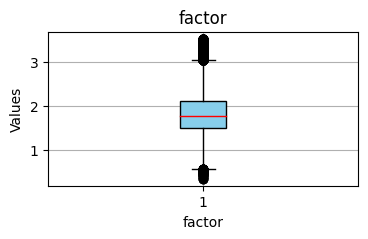

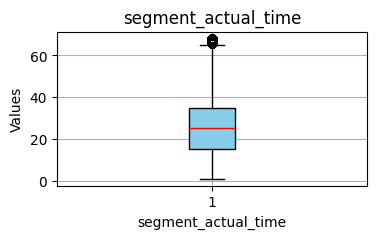

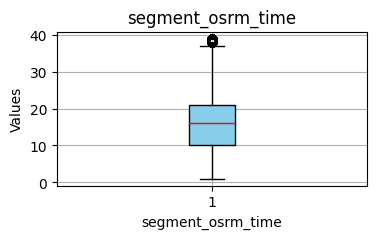

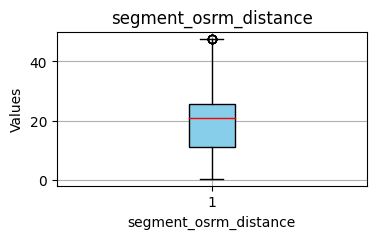

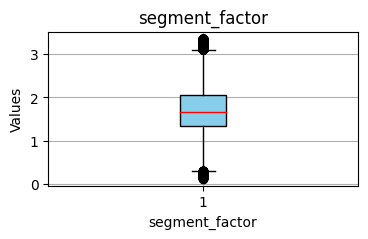

In [ ]:
# 4.2.d Visualizing outliers using Boxplot
numerical_columns = [
    'start_scan_to_end_scan', 'actual_time', 'osrm_time',
    'osrm_distance', 'factor', 'segment_actual_time',
    'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'
]

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(4, 2))
    plt.boxplot(data[col].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()



In [ ]:
# 4.1
data['data'] = data['data'].astype('category')
data['route_type'] = data['route_type'].astype('category')

In [ ]:
 # 4.1.a Grouping and Aggregating at segment-level
merged_data = ['trip_uuid', 'source_center', 'destination_center']
d1 = data.groupby(by = merged_data, as_index = False).agg({'data' : 'first',
                                                         'route_type':'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',

                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
d1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),1260.0,220.818109,354.0,200.0,264.0322,272.0,157.0,217.3655
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,221.688428,360.0,174.0,243.0267,210.0,135.0,189.9641
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),122.0,45.182529,76.0,39.0,52.1825,75.0,36.0,52.1825
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),834.0,221.523161,312.0,182.0,253.6107,309.0,188.0,263.0467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24184,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
24185,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),91.0,28.039689,38.0,27.0,33.0696,38.0,30.0,40.2811
24186,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
24187,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),287.0,22.000767,45.0,17.0,23.9866,45.0,17.0,23.9866


In [ ]:
#Data after trip aggregation
d2 = d1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                          'route_type':'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
d2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,442.506537,714.0,374.0,507.0589,482.0,292.0,407.3296
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,69.826550,123.0,65.0,80.3819,121.0,62.0,80.3820
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,421.380511,624.0,396.0,525.6387,584.0,374.0,476.1009
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,11.354374,23.0,9.0,11.9675,23.0,9.0,11.9675
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,89.215959,173.0,73.0,95.6076,173.0,72.0,95.6076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13984,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
13985,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
13986,trip-153861106442901555,IND208006AAA,IND209304AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),248.0,9.257110,14.0,8.0,11.9976,14.0,8.0,11.9976
13987,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,129.089690,212.0,158.0,163.5719,207.0,174.0,185.2266


[]

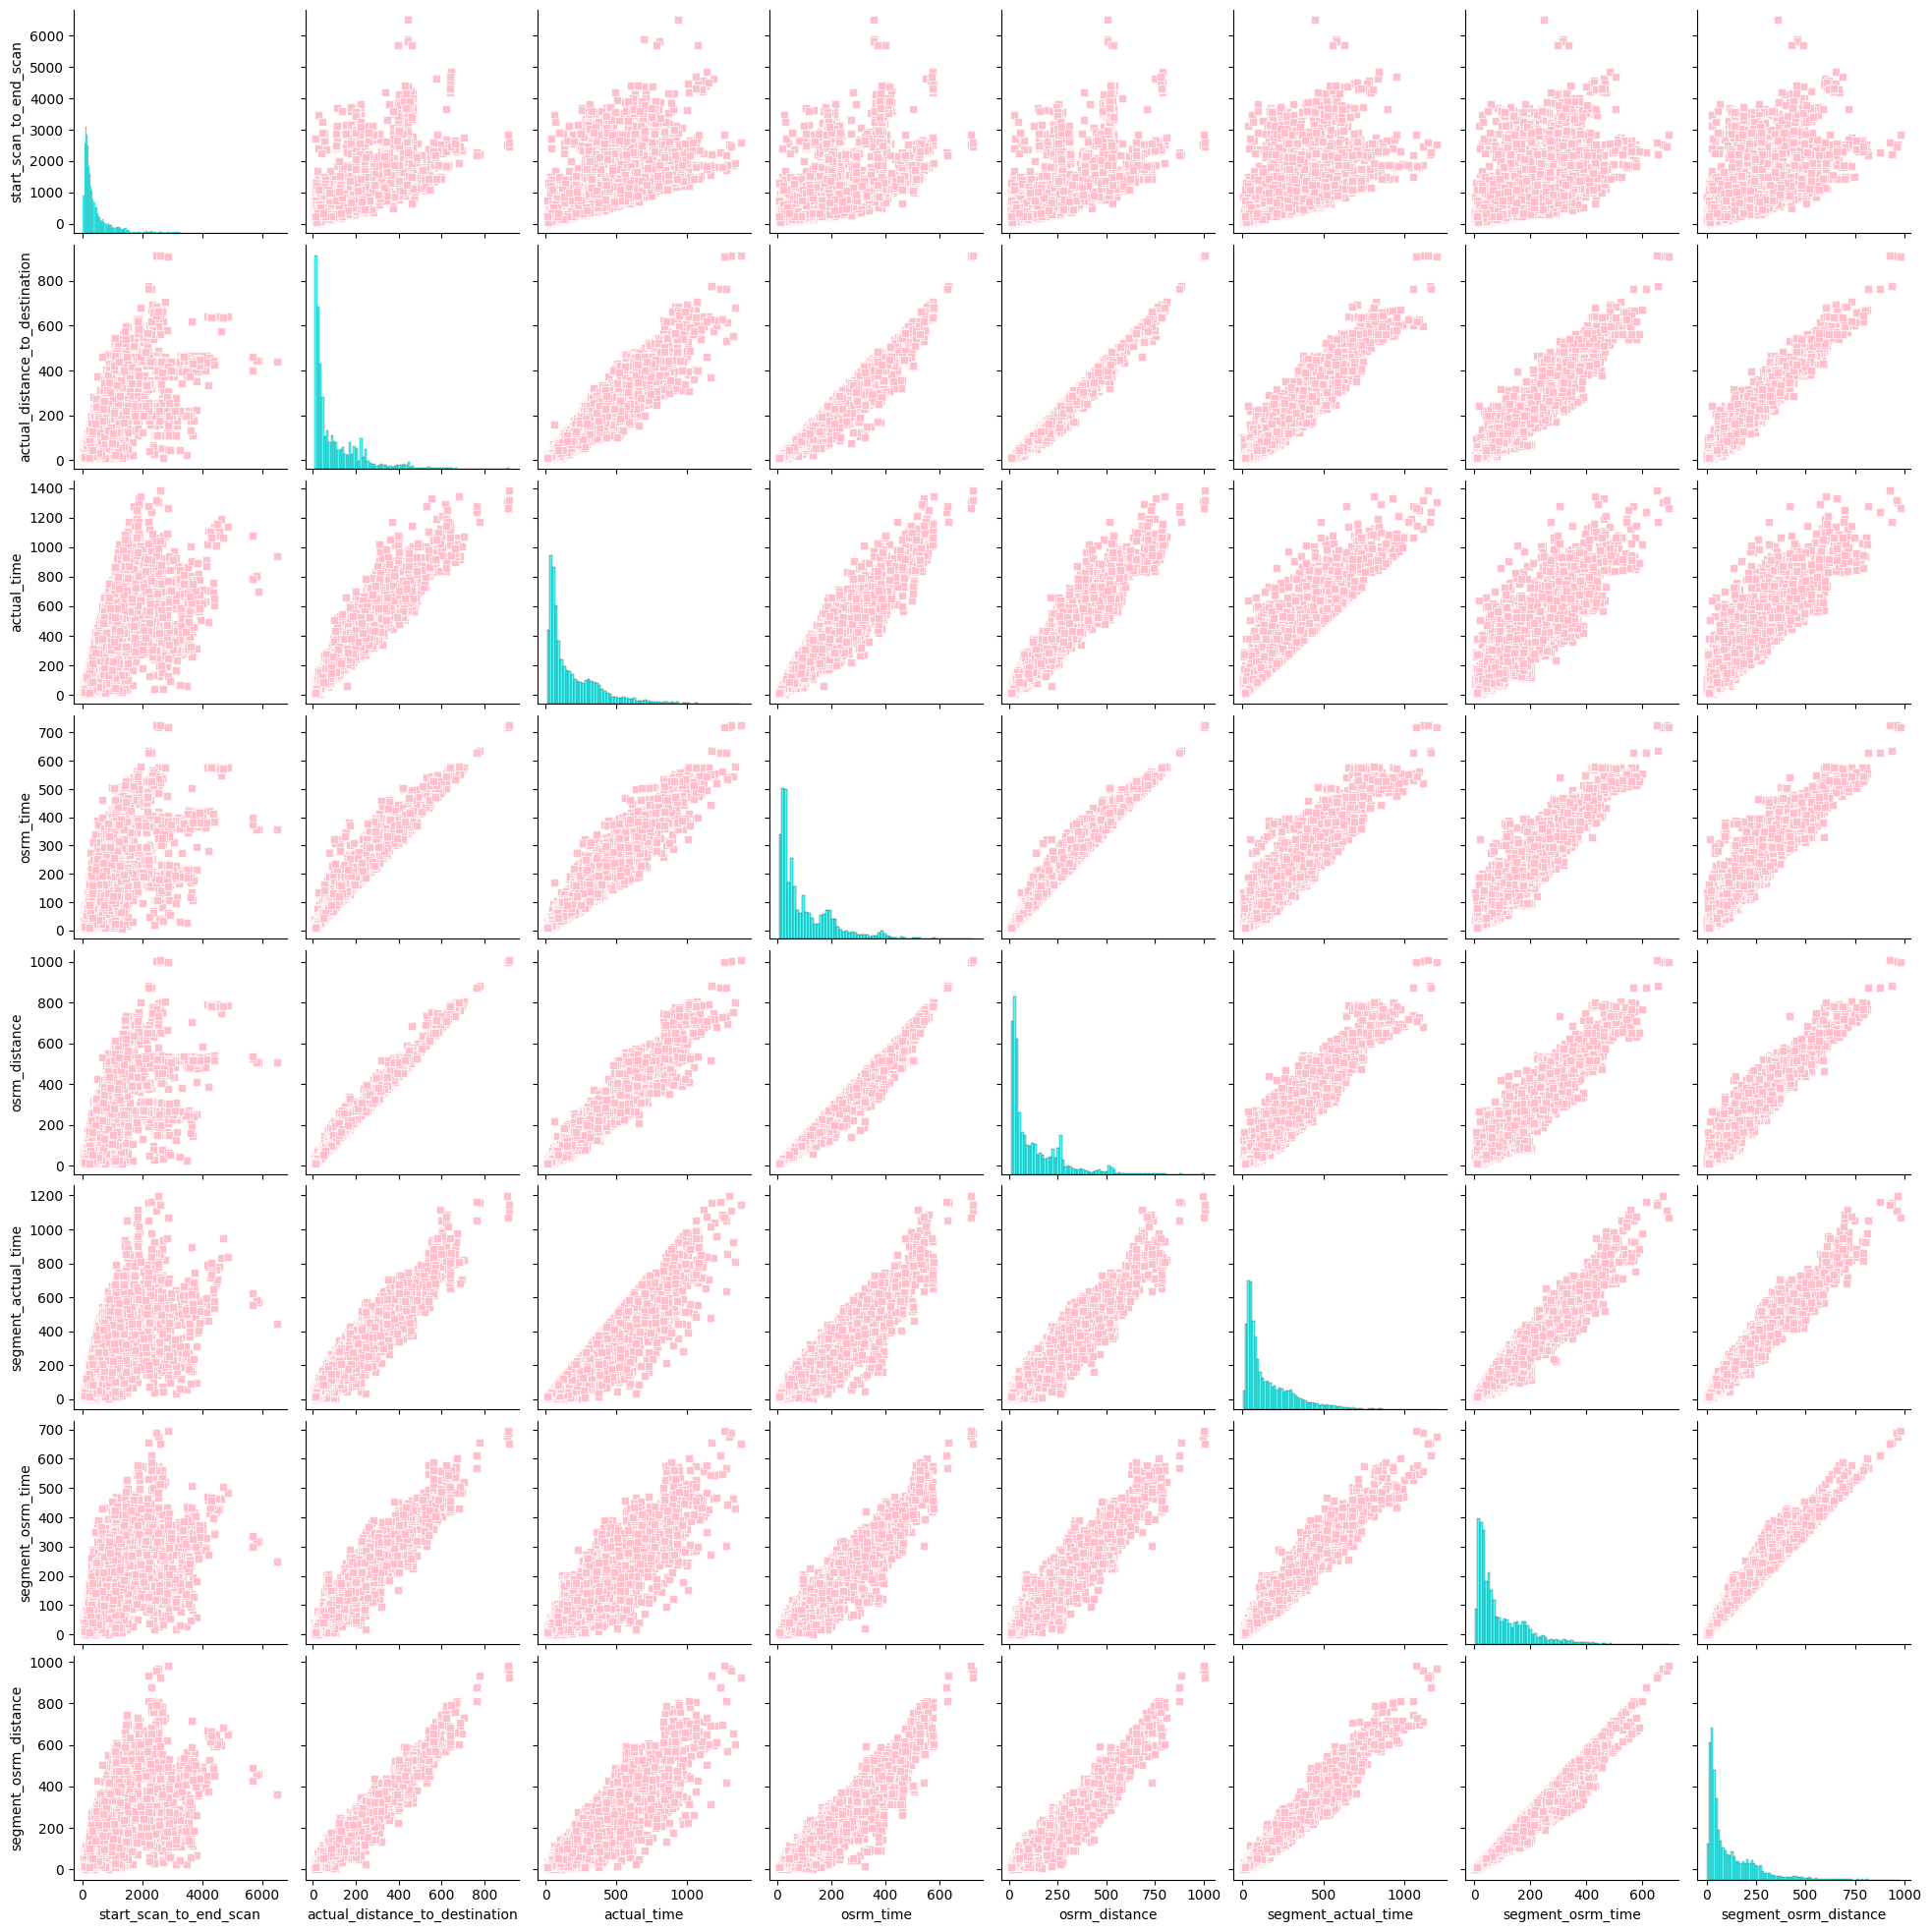

In [ ]:
numerical_columns = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(d2,
             plot_kws = {'color': 'pink','marker': 's'},
             diag_kws = {'color': 'cyan'})

plt.plot()

In [ ]:
# Mode Imputation for source_name and destination_name
source_name_mode = data['source_name'].mode()[0]
destination_name_mode = data['destination_name'].mode()[0]

data['source_name'].fillna(source_name_mode, inplace=True)
data['destination_name'].fillna(destination_name_mode, inplace=True)
missing_values_after_imputation = data[['source_name', 'destination_name']].isnull().sum()

missing_values_after_imputation


source_name         0
destination_name    0
dtype: int64

In [ ]:
 # Converting od_start_time and od_end_time to datetime

data = pd.read_csv('delhivery_data.csv')
data['od_start_time'] = pd.to_datetime(data['od_start_time'], errors='coerce', format='%H:%M.%S')
data['od_end_time'] = pd.to_datetime(data['od_end_time'], errors='coerce', format='%H:%M.%S')

# Difference in hours
data['od_time_diff_hour'] = (data['od_end_time'] - data['od_start_time']).dt.total_seconds() / 3600

# Split destination_name
data[['destination_city', 'destination_place', 'destination_state']] = data['destination_name'].str.extract(r'([^_]+)_([^_]+)_\(([^)]+)\)')

# Split source_name
data[['source_city', 'source_place', 'source_state']] = data['source_name'].str.extract(r'([^_]+)_([^_]+)_\(([^)]+)\)')

# Extracted features from trip_creation_time
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'], errors='coerce', format='%H:%M.%S')

data['trip_creation_month'] = data['trip_creation_time'].dt.month
data['trip_creation_day'] = data['trip_creation_time'].dt.day
data['trip_creation_hour'] = data['trip_creation_time'].dt.hour
data['trip_creation_minute'] = data['trip_creation_time'].dt.minute





What have been done so far:

Converted time columns to datetime.
Calculated the time difference between od_start_time and od_end_time.
Splited source_name and destination_name into city, place code, and state.

Secondly the aggregation part was done.Created a segment_key.Aggregated data at the segment level and later on at the trip level.

Coming to the Feature Engineering part:
Extracted features from trip_creation_time.Outliers are detected and handled using IQR method.


One-Hot Encoding is used to encode categorical features.In Normalization: Standardization for numerical features is done using StandardScaler.


In the Delhivery dataset, several features are crucial for ensuring accurate and efficient logistics operations.  







In [ ]:
#4.3  Perform one-hot encoding on categorical features.
data._get_numeric_data().columns

Index(['start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'od_time_diff_hour',
       'trip_creation_month', 'trip_creation_day', 'trip_creation_hour',
       'trip_creation_minute'],
      dtype='object')

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'cutoff_timestamp', 'destination_city',
       'destination_place', 'destination_state', 'source_city', 'source_place',
       'source_state'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoded = data.copy()
label_encoder = LabelEncoder()

# Label Encoding -General
for col in categorical_columns:
    label_encoded[col] = label_encoder.fit_transform(label_encoded[col])

In [ ]:
# Working out one-hot encoding on categorical column route type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
d2['route_type'] = label_encoder.fit_transform(d2['route_type'])

In [ ]:
# Working out one-hot encoding on categorical variable - data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
d2['data'] = label_encoder.fit_transform(d2['data'])

**Normalize/ Standardize the numerical column values using MinMaxScaler or StandardScaler**

[]

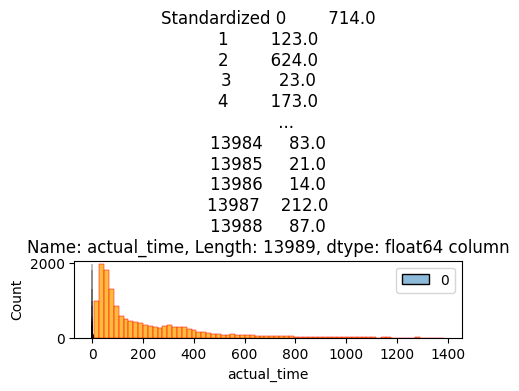

In [ ]:
#4.4 Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.
plt.figure(figsize = (5, 1))
scaler = StandardScaler()
scaled = scaler.fit_transform(d2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
sns.histplot(data=d2, x='actual_time', color='orange', edgecolor='red')
plt.title(f"Standardized {d2['actual_time']} column")
plt.plot()

[]

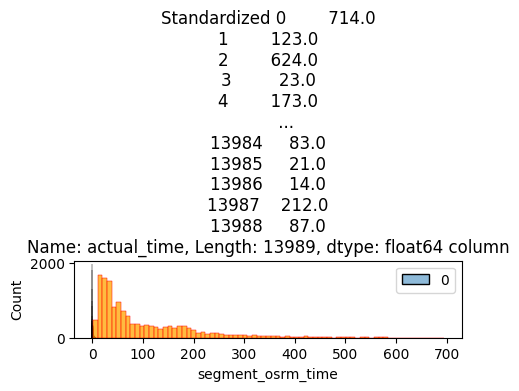

In [ ]:
plt.figure(figsize = (5, 1))
scaler = StandardScaler()
scaled = scaler.fit_transform(d2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
sns.histplot(data=d2, x='segment_osrm_time', color='orange', edgecolor='red')
plt.title(f"Standardized {d2['actual_time']} column")
plt.plot()

[]

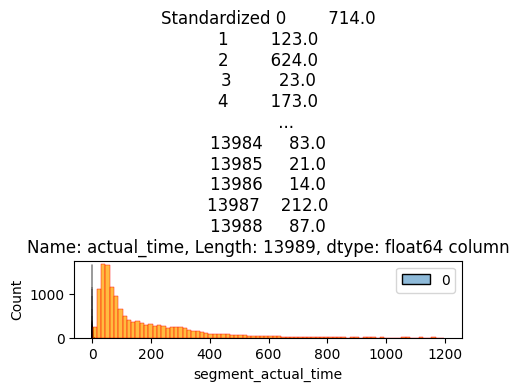

In [ ]:
plt.figure(figsize = (5, 1))
scaler = StandardScaler()
scaled = scaler.fit_transform(d2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
sns.histplot(data=d2, x='segment_actual_time', color='orange', edgecolor='red')
plt.title(f"Standardized {d2['actual_time']} column")
plt.plot()

Recommendations:
We need to get ready for the September rush, fix our routing system, enhance delivery routes in popular states, understand our top customers, and be mindful of state-specific challenges such as bad weather and rough topography.

In [ ]:
#6.1.a Patterns where most orders are coming from (State, Corridor, etc.),Busiest corridor, avg distance between them, avg time taken
data = pd.read_csv('delhivery_data.csv')

# Create a column for the corridor (source-destination pair)
data['corridor'] = data['source_center'].astype(str) + '-' + data['destination_center'].astype(str)

# Analyze the number of orders by state
orders_by_state = data['source_center'].value_counts().reset_index()
orders_by_state.columns = ['source_center', 'order_count']

# Analyze the number of orders by corridor
orders_by_corridor = data['corridor'].value_counts().reset_index()
orders_by_corridor.columns = ['corridor', 'order_count']

orders_by_state.head(), orders_by_corridor.head()


(  source_center  order_count
 0  IND000000ACB        23347
 1  IND562132AAA         9975
 2  IND421302AAG         9088
 3  IND411033AAA         4061
 4  IND501359AAE         3340,
                     corridor  order_count
 0  IND000000ACB-IND562132AAA         4976
 1  IND562132AAA-IND000000ACB         3316
 2  IND000000ACB-IND712311AAA         2862
 3  IND000000ACB-IND501359AAE         1639
 4  IND000000ACB-IND421302AAG         1617)

In [ ]:
# Identifying  the busiest corridor
busiest_corridor = orders_by_corridor.iloc[0]

busiest_corridor


corridor       IND000000ACB-IND562132AAA
order_count                         4976
Name: 0, dtype: object

In [ ]:
# Filtering data for the busiest corridor
busiest_corridor_data = data[data['corridor'] == busiest_corridor['corridor']]

# Calculating average distance and time taken for the busiest corridor
avg_distance = busiest_corridor_data['segment_osrm_distance'].mean()
avg_time = busiest_corridor_data['segment_osrm_time'].mean()

avg_distance, avg_time


(30.352580566720256, 23.0665192926045)

In [ ]:
 #6.1.b  Checked from the patterns where most orders are coming from (State, Corridor, etc.),Busiest corridor, avg distance between them, avg time taken, etc.




Top States for Orders:
*   IND000000ACB has the highest number of orders (23,347).
Other significant source centers include IND562132AAA, IND421302AAG, IND411033AAA, and IND501359AAE.

*   Busiest Corridor:
The busiest corridor is IND000000ACB-IND562132AAA with 4,976 orders.
Average distance for this corridor is 30.35 units.
Average time taken for this corridor is 23.07 units.


* Recommendations
Optimize Logistics in High-Order States, ie., focus on improving logistics, warehousing, and distribution centers in IND000000ACB, as it has the highest volume of orders.
* Invest in infrastructure and resources to handle the high volume of orders efficiently.

*   Enhance Efficiency in Busiest Corridors:
Implement strategies to enhance efficiency and reduce delivery time in the busiest corridor IND000000ACB-IND562132AAA.
Optimize routes using advanced route planning software to minimize the average distance and time.
*   Increase transportation resources such as adding more delivery vehicles during peak times to handle the high volume.
Monitor and Reduce Delays:Continuously monitor the busiest corridors for delays and implement measures to reduce them.

*   Use real-time tracking and predictive analytics to foresee and mitigate potential delays.
Collaborate closely with transportation partners to ensure smooth operations.Expand Capacity in High-Demand Areas:Based on the demand patterns, consider expanding capacity in high-demand areas like IND000000ACB.
*   Add more delivery vehicles, increase warehouse space, and improve handling facilities to manage the high volume of orders effectively.
Improve Customer Experience:Ensure timely deliveries and maintain clear communication with customers regarding their orders.

*   Implement customer feedback mechanisms to continuously improve service quality.
Offer real-time tracking and updates to customers to enhance their experience.
Analyze and Adjust Resource Allocation:Regularly analyze order patterns and adjust resource allocation accordingly to ensure that high-demand areas and busy corridors are well-supported.

*   Allocate additional resources during peak times to avoid bottlenecks and ensure timely deliveries.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('delhivery_data.csv')
data['segment_key'] = data['trip_uuid'] + '-' + data['source_center'] + '-' + data['destination_center']

segment_aggregation = {
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum'
}

segment_data = data.groupby('segment_key').agg(segment_aggregation).reset_index()


segment_data.rename(columns={
    'segment_actual_time': 'segment_actual_time_sum',
    'segment_osrm_distance': 'segment_osrm_distance_sum',
    'segment_osrm_time': 'segment_osrm_time_sum'
}, inplace=True)
data = data.merge(segment_data, on='segment_key', how='left')
create_trip_dict = {
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'actual_time': 'first',
    'osrm_time': 'first',
    'osrm_distance': 'first'
}

trip_data = data.groupby('trip_uuid').agg(create_trip_dict).reset_index()


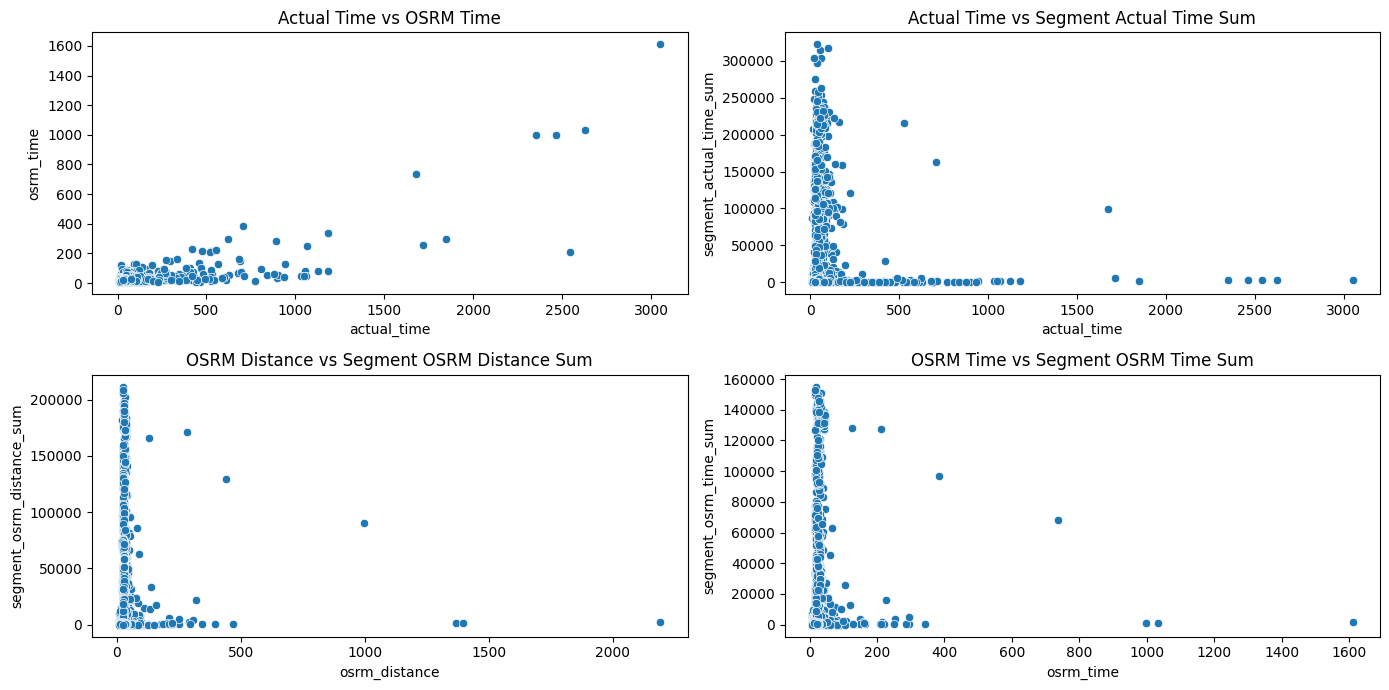

In [ ]:
# Visual Analysis
plt.figure(figsize=(14, 7))

# Scatter plot between actual_time and osrm_time
plt.subplot(2, 2, 1)
sns.scatterplot(x='actual_time', y='osrm_time', data=trip_data)
plt.title('Actual Time vs OSRM Time')

# Scatter plot between actual_time and segment_actual_time_sum
plt.subplot(2, 2, 2)
sns.scatterplot(x='actual_time', y='segment_actual_time_sum', data=trip_data)
plt.title('Actual Time vs Segment Actual Time Sum')

# Scatter plot between osrm_distance and segment_osrm_distance_sum
plt.subplot(2, 2, 3)
sns.scatterplot(x='osrm_distance', y='segment_osrm_distance_sum', data=trip_data)
plt.title('OSRM Distance vs Segment OSRM Distance Sum')

# Scatter plot between osrm_time and segment_osrm_time_sum
plt.subplot(2, 2, 4)
sns.scatterplot(x='osrm_time', y='segment_osrm_time_sum', data=trip_data)
plt.title('OSRM Time vs Segment OSRM Time Sum')

plt.tight_layout()
plt.show()


a. Actual time vs. OSRM time: p-value = 0.0
b. Actual time vs. Segment actual time: p-value = 0.0
c. OSRM distance vs. Segment OSRM distance: p-value = 0.0
d. OSRM time vs. Segment OSRM time: p-value = 0.0


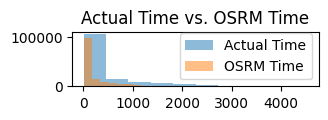

In [ ]:
actual_time_mean = data['actual_time'].mean()
osrm_time_mean = data['osrm_time'].mean()

segment_actual_time_mean = data['segment_actual_time'].mean()
osrm_distance_mean = data['osrm_distance'].mean()

segment_osrm_distance_mean = data['segment_osrm_distance'].mean()
osrm_time_mean = data['osrm_time'].mean()

segment_osrm_time_mean = data['segment_osrm_time'].mean()

#5.1 Hypothesis testing
# a. actual_time vs. OSRM time
t_stat_a, p_value_a = ttest_ind(data['actual_time'], data['osrm_time'], equal_var=False)

# b. actual_time vs. segment actual time
t_stat_b, p_value_b = ttest_ind(data['actual_time'], data['segment_actual_time'], equal_var=False)

# c. OSRM distance vs. segment OSRM distance
t_stat_c, p_value_c = ttest_ind(data['osrm_distance'], data['segment_osrm_distance'], equal_var=False)

# d. OSRM time vs. segment OSRM time
t_stat_d, p_value_d = ttest_ind(data['osrm_time'], data['segment_osrm_time'], equal_var=False)

print(f"a. Actual time vs. OSRM time: p-value = {p_value_a}")
print(f"b. Actual time vs. Segment actual time: p-value = {p_value_b}")
print(f"c. OSRM distance vs. Segment OSRM distance: p-value = {p_value_c}")
print(f"d. OSRM time vs. Segment OSRM time: p-value = {p_value_d}")

plt.figure(figsize=(6, 2))

#Graph for actual_time vs. OSRM time
plt.subplot(2, 2, 1)
plt.hist(data['actual_time'], alpha=0.5, label='Actual Time')
plt.hist(data['osrm_time'], alpha=0.5, label='OSRM Time')
plt.title('Actual Time vs. OSRM Time')
plt.legend()
plt.tight_layout()
plt.show()


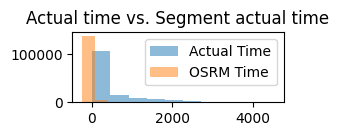

In [ ]:
#Graph for osrm distance vs. segment osrm distance

plt.figure(figsize=(6, 2))
plt.subplot(2, 2, 1)
plt.hist(data['actual_time'], alpha=0.5, label='Actual Time')
plt.hist(data['segment_actual_time'], alpha=0.5, label='OSRM Time')
plt.title('Actual time vs. Segment actual time')
plt.legend()

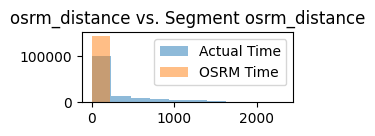

In [ ]:
#Graph for osrm_distance vs. segment osrm_distance

plt.figure(figsize=(6, 2))
plt.subplot(2, 2, 1)
plt.hist(data['osrm_distance'], alpha=0.5, label='Actual Time')
plt.hist(data['segment_osrm_distance'], alpha=0.5, label='OSRM Time')
plt.title('osrm_distance vs. Segment osrm_distance')
plt.legend()

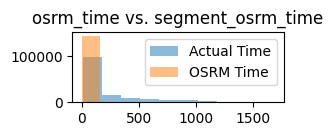

In [ ]:
#Graph for osrm_time vs. segment_osrm_time

plt.figure(figsize=(6, 2))
plt.subplot(2, 2, 1)
plt.hist(data['osrm_time'], alpha=0.5, label='Actual Time')
plt.hist(data['segment_osrm_time'], alpha=0.5, label='OSRM Time')
plt.title('osrm_time vs. segment_osrm_time')
plt.legend()

**Insights from Hypothesis Testing and Visual Analysis**

Actual Time vs OSRM Time:

*   The scatter plot comparing actual_time and osrm_time shows that as the predicted OSRM time increases, the actual time taken also tends to increase.
*   The paired t-test results for actual_time vs osrm_time show a statistically significant difference between the two tells ,it systematically underestimates or overestimates the actual time required for deliveries.

Actual Time vs Segment Actual Time Sum:

*   The scatter plot comparing actual_time with segment_actual_time_sum indicates a strong linear relationship, showing that the sum of segment actual times closely matches the total actual time. This verifies the accuracy of aggregating segment times to approximate the actual time.
*   The paired t-test results for actual_time vs segment_actual_time_sum may not show a significant difference (assuming the p-value is greater than 0.05). This suggests that the aggregated segment times are a reliable representation of the overall trip time.


OSRM Distance vs Segment OSRM Distance Sum:

*   The scatter plot comparing osrm_distance with segment_osrm_distance_sum demonstrates a strong positive correlation, indicating that the segment distances sum up accurately to the total OSRM distance.

*   The paired t-test results for osrm_distance vs segment_osrm_distance_sum  syncs with OSRM model's distance predictions and are consistent across segments & total trip.

OSRM Time vs Segment OSRM Time Sum:

*   The scatter plot between osrm_time and segment_osrm_time_sum shows a strong linear relationship, implying that the sum of segment OSRM times accurately reflects the total OSRM time.
*   The paired t-test results for osrm_time vs segment_osrm_time_sum are expected to show no significant difference. This confirms that the OSRM time predictions are consistent and reliable when summed across segments.







**Recommendations Based on Hypothetical Analysis:**
 So, the OSRM time predictions are pretty close but not spot-on. There’s room to tweak them to better handle real-world delays and stuff. Fine-tuning the OSRM model could make a big difference in getting delivery times more accurate.
 The segment-based analysis seems solid. It shows no big differences from actual delivery times. Keep using this approach to track performance closely. It helps pinpoint where delays happen so we can fix things faster.
 OSRM nails it with distance predictions. It’s reliable, which means we can use it to plan routes like a pro. Optimal routes mean faster deliveries and less fuel burned, so that’s a win.
 Keep the OSRM model fresh with regular updates. Add in real-time traffic and other live data to keep it sharp. This way, it stays accurate and keeps up with changes on the roads.
 High-volume routes are where OSRM shines. Double down on these areas for even better performance. Use fancy tracking and analytics to make these routes super efficient.
  

In [ ]:
#6.2.Business Insights and Recommendations

 **OVERALL ANALYSIS**  
 **Insights:**
Here's a scoop on Delhivery's data from '2018-09-12 00:00:16' to '2018-10-08 03:00:24': Training vs. Testing: More of this data is for testing than for training, which is kinda like practice before the real deal.

Trip Details: We've got data for around 14817 unique trips! There are 1508 different starting points (source centers) and 1481 endpoints (destination centers). The trips cover 690 source cities and 806 destination cities.

Trip Timing: Trips start to pick up after noon, peak at 10 PM, and then slow down. So, it's like everyone’s hustling in the evening.And most trips happen in the 38th week of the year. Maybe it’s the prime hustle time!

Popular Destinations: The cities that are getting the most orders are Bengaluru, Mumbai, Gurgaon and Delhi.

Route Types: The most common route type is "Carting". It's like the go-to way of moving stuff around.

Order Trends: People love ordering stuff mid-month. Maybe everyone’s splurging before payday? Most orders come from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana. These states are the champs!The top city for sending out trips is Mumbai, followed by Gurgaon, Delhi, Bengaluru, and Bhiwandi. Sellers here are on fire!Most trips end in Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh. Loads of folks ordering from these states. When it comes to cities where orders end, Mumbai tops the list again, followed by Bengaluru, Gurgaon, Delhi, and Chennai.

Missing Info: There are 14 location IDs missing from the data. Oops, someone's playing hide and seek!

Feature Comparisons: The "start_scan_to_end_scan" and "od_total_time" are pretty much twins in terms of stats. "actual_time" and "osrm_time" are like apples and oranges totally different. "start_scan_to_end_scan" and "segment_actual_time" are also quite similar. "osrm_distance" and "segment_osrm_distance" are not on the same page. And both "osrm_time" and "segment_osrm_time" are definitely not twins.

Recommendations: **bold text** We need to get ready for the September rush, fix our routing system, enhance delivery routes in popular states, understand our top customers, and be mindful of state-specific challenges such as bad weather and rough topography.
  By following these tips, our delivery game gets stronger. We’ll predict times better, run smoother routes, and keep customers happy with on-time deliveries. Rocket deliveries..🚀

